In [4]:
# This code is my practice from the online course on https://www.youtube.com/playlist?list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v
# KNN Classification Example

# Using Breast Cancer datasets
# from UCIrvine data repository (archive.ics.uci.edu/ml/datasets.html)
import numpy as np
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split # for cross_validation
import pandas as pd

In [73]:
df = pd.read_csv('breast-cancer-wisconsin.data')
df.replace('?', -99999, inplace=True) # making a huge outlier in place of a missing datapoint
df.drop(['id'], 1, inplace=True)

X = np.array(df.drop(['class'],1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

C:\Users\mahva\AppData\Local\Temp/ipykernel_25120/3132182235.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(['id'], 1, inplace=True)
C:\Users\mahva\AppData\Local\Temp/ipykernel_25120/3132182235.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['class'],1))


In [74]:
# Defining the classifier
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9857142857142858


In [33]:
# Prediction
example_measures = np.array([4,2,1,1,1,2,3,2,1])
example_measures = example_measures.reshape(1, -1)
# example_measures = np.array([[4,2,1,1,1,2,3,2,1],[4,2,1,2,2,2,3,2,1]])
# example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
print(prediction)

[2]


In [61]:
# building K Nearest Neighbors FROM SCRATCH
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
import warnings
from matplotlib import style
from collections import Counter
import pandas as pd
import random
style.use('fivethirtyeight')

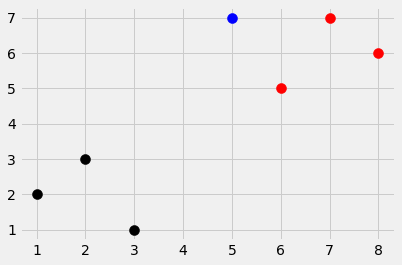

In [52]:
# small dataset to test the algorithm
dataset = {'k':[[1,2], [2,3], [3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]

# for i in dataset:
#     for ii in dataset[i]:
#         plt.scatter(ii[0], ii[1], s = 100, color=i)
[[plt.scatter(ii[0], ii[1], s = 100, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], s = 100, color = 'b')
plt.show()

In [70]:
def k_nearest_neighbors(data, predict, k =3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
    distances = []
    for group in data:
        for features in data[group]:
#             euclidean_distance = sqrt( (features[0]-prediction[0])**2 + (features[1]-prediction[1])**2 )    
#             euclidean_distance = np.sqrt( np.sum( (np.array(features) - np.array(predict))**2 ) )
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance, group])
    votes = [i[1] for i in sorted(distances)[:k]] # get the k closest ones
#     print(Counter(votes).most_common(1))
    vote_result = Counter(votes).most_common(1)[0][0] # which group is repeating
    confidence = Counter(votes).most_common(1)[0][1] / k
#     print(vote_result, confidence)
    return vote_result, confidence
results = k_nearest_neighbors(dataset, new_features, k=3)
print(results)

('r', 1.0)


In [72]:
# Using the breast cancer dataset
df = pd.read_csv('breast-cancer-wisconsin.data')
df.replace('?', -99999, inplace=True) # making a huge outlier in place of a missing datapoint
df.drop(['id'], 1, inplace=True)
full_data = df.astype(float).values.tolist()
random.shuffle(full_data)

test_size=0.2
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

# populate the test and training dictionaries
for i in train_data:
    train_set[i[-1]].append(i[:-1])

for i in test_data:
    test_set[i[-1]].append(i[:-1])

correct = 0
total=0

for group in test_set:
    for data in test_set[group]:
        vote, confidence = k_nearest_neighbors(train_set, data, k = 5)
        if group == vote:
            correct += 1
#         else:
#             print(confidence)
        total += 1

print('Accuracy:', correct/total)

C:\Users\mahva\AppData\Local\Temp/ipykernel_25120/1372761946.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(['id'], 1, inplace=True)


Accuracy: 0.9568345323741008
